In [1]:
# A linear regression learning algorithm example using TensorFlow library.

# Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [12]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [6]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
print(train_X)
n_samples

[  3.3     4.4     5.5     6.71    6.93    4.168   9.779   6.182   7.59
   2.167   7.042  10.791   5.313   7.997   5.654   9.27    3.1  ]


17

In [7]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [10]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [13]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [16]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.084017560 W= 0.203013 b= 1.13657
Epoch: 0100 cost= 0.083210528 W= 0.205783 b= 1.11664
Epoch: 0150 cost= 0.082496352 W= 0.208388 b= 1.09789
Epoch: 0200 cost= 0.081864424 W= 0.210839 b= 1.08027
Epoch: 0250 cost= 0.081305251 W= 0.213144 b= 1.06369
Epoch: 0300 cost= 0.080810368 W= 0.215311 b= 1.04809
Epoch: 0350 cost= 0.080372371 W= 0.21735 b= 1.03342
Epoch: 0400 cost= 0.079984777 W= 0.219268 b= 1.01963
Epoch: 0450 cost= 0.079641744 W= 0.221072 b= 1.00665
Epoch: 0500 cost= 0.079338133 W= 0.222768 b= 0.994446
Epoch: 0550 cost= 0.079069450 W= 0.224364 b= 0.982968
Epoch: 0600 cost= 0.078831613 W= 0.225864 b= 0.972172
Epoch: 0650 cost= 0.078621119 W= 0.227276 b= 0.962018
Epoch: 0700 cost= 0.078434825 W= 0.228603 b= 0.95247
Epoch: 0750 cost= 0.078269936 W= 0.229851 b= 0.94349
Epoch: 0800 cost= 0.078123957 W= 0.231026 b= 0.935044
Epoch: 0850 cost= 0.077994756 W= 0.23213 b= 0.927101
Epoch: 0900 cost= 0.077880338 W= 0.233168 b= 0.919629
Epoch: 0950 cost= 0.077779047 W= 0.234145

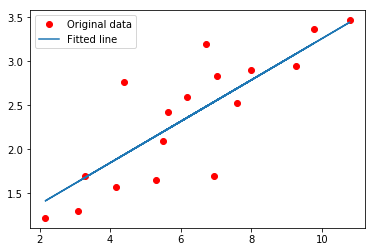

In [17]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [18]:
# Regression result